IMPLEMENT MULTIPLE LINEAR REGRESSION WITH SGD

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('C:\\Users\\Lenovo\\OneDrive\\Desktop\\coursera_ml\\data2.csv')
arr = df.to_numpy()
print(arr)

m = arr.shape[0]   #no of rows
n = arr.shape[1]-1  #no of features
print(m, n)

[[2104    5    1   45  460]
 [1416    3    2   40  232]
 [ 852    2    1   35  178]]
3 4


In [30]:
x_train = []
y_train = []

for i in range(m):
    x_train.append(arr[i][:n])
    y_train.append(arr[i][n])

x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train)
print(y_train)


[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
[460 232 178]


In [31]:
#func to scale the features

def z_score_norm(x):

    """
    func to normalise the features using z score normalisation

    Args:
        x (ndarray (m,n)): the input feature matrix
    
    returns:
        x_norm (ndarray (m,n)): the scaled features 
        mu (ndarray (n,)): the mean values for each of the features
        sigma (ndarray (n,)): the std dev values for each of the features    
    """

    mu = np.mean(x, axis=0)   #returns ndarray (n,)
    sigma = np.std(x, axis=0)  # same 

    x_norm = (x-mu)/sigma #the ndarray(m,n) with normalisation

    return x_norm, mu, sigma

In [32]:
#func to find cost

def calculate_cost(x, y, w, b, m):

    """
    used to find the cost value at any instant of the model
    Args:
        x (ndarray (m,n)): 2d np array of the features
        y (ndarray (m,)): 1d np array of the targets
        w (ndarray (n,)): 1d np array of the weights
        b (scalar): bias
        m (scalar): number of rows
    
    Returns:
        J (scalar): the cost value
    """
    
    J = 0

    for i in range(m):
        J += (np.dot(w,x[i]) + b - y[i])**2
    
    J /= (2*m)
    return J

In [33]:
#func to find gradient

def calculate_gradient(x, y, w, b, n, i):
    
    """
    used to find the gradient vector and dJ_db
    Args:
        x (ndarray (m,n)): 2d np array of the features
        y (ndarray (m,)): 1d np array of the targets
        w (ndarray (n,)): 1d np array of the weights
        b (scalar): bias
        n (scalar): number of cols
        i (scalar): the row number
    
    Returns:
        d (ndarray (n,)): 1d np array containing gradient of each of the weights wrt cost
        dJ_db (scalar): the gradient of cost wrt bias
    """

    d = []
    dJ_db = 0

    for j in range(n):
        d.append(
            ((np.dot(w,x[i]) + b - y[i])*x[i][j])
        )
    dJ_db += (np.dot(w,x[i]) + b - y[i])

    d = np.array(d)

    return d, dJ_db

In [34]:
#the main func

def linear_regr(x, y, w, b, m, n, a, e):


    e_history = []
    cost_history = []

    tmp_df = df

    for i in range(e):
        for j in range(m):
            d, dJ_db = calculate_gradient(x, y, w, b, n, j)

            w -= a*d
            b -= a*dJ_db

        if (i+1)%100 == 0:
            J = calculate_cost(x, y, w, b, m)
            print(f"iteration: {i+1} cost: {J}")
            e_history.append(i+1)
            cost_history.append(J)

        # x, y, shuff_df = shuffle(tmp_df, m)
        # tmp_df = shuff_df

    return w, b, e_history, cost_history

In [35]:
w_in = np.zeros(n)
print(w_in)
b_in = 0
a = 0.01    #### it was 2.0e-8 when features were not scaled 
epochs = 1000

x_train_scaled, mu, sigma = z_score_norm(x_train)

w, b, e_history, cost_history = linear_regr(x_train_scaled, y_train, w_in, b_in, m, n, a, epochs)
print(w)
print(b)


[0. 0. 0. 0.]
iteration: 100 cost: 88.84812836688296
iteration: 200 cost: 0.18756575982485912
iteration: 300 cost: 0.00039654599859547984
iteration: 400 cost: 8.39542888441766e-07
iteration: 500 cost: 1.7798854449513868e-09
iteration: 600 cost: 3.778594679523744e-12
iteration: 700 cost: 8.032404963124829e-15
iteration: 800 cost: 1.7097021163521943e-17
iteration: 900 cost: 3.639608171922664e-20
iteration: 1000 cost: 7.872608007971524e-23
[ 38.05161505  41.54327451 -30.98894656  36.34177447]
289.9999999999875


In [36]:
#Again SGD does perform better than BGD for same epochs and learning rate value given that feature scaling
#is applied

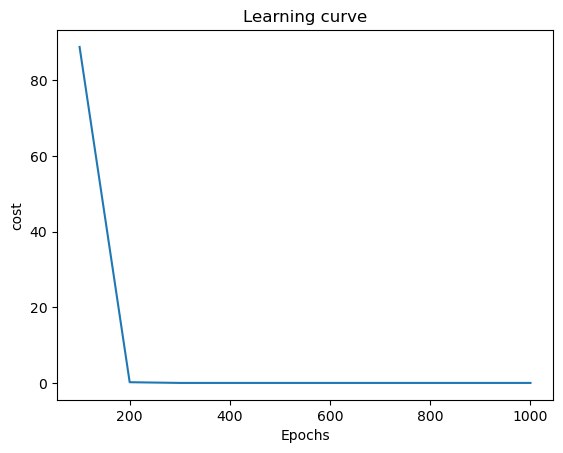

In [37]:
plt.plot(e_history, cost_history)
plt.title("Learning curve")
plt.xlabel("Epochs")
plt.ylabel("cost")
plt.show()

In [38]:
def trained_model(x):
    global w,b

    """
    returns the best fit lines output
    Args:
        x (scalar): new input
    Returns:
        y (scalar): the predicted output    
    """
    
    y = np.dot(w, x) + b
    return y

In [39]:
#plotting the predicted targets vs actual ones
#since there are multiple features we plot a shared plot with shared y and multiples x

y_pred_training = []

for g in range(m):
    y_pred_training.append(trained_model(x_train_scaled[g]))

y_pred_training = np.array(y_pred_training)
print(y_pred_training)

x_features = ['Size(sqft)','Number_of_Bedrooms','Number_of_floors','Age_of_Home']



[460. 232. 178.]


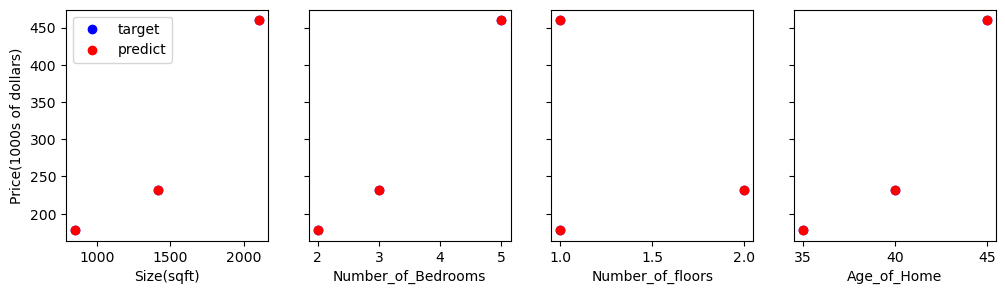

In [40]:
#cont..
fig, ax = plt.subplots(1, 4, figsize=(12,3), sharey=True)

for f in range(len(ax)):
    ax[f].scatter(x_train[:, f], y_train,c='b', label='target')   #for the target
    ax[f].set_xlabel(x_features[f])
    ax[f].scatter(x_train[:, f], y_pred_training,c='r',label='predict')  #for the prediction

ax[0].set_ylabel("Price(1000s of dollars)")
ax[0].legend()
plt.show()



In [ ]:
#the model is trained so good that the red dots overshadow the blue ones(might also be a case of overfitting)